In [1]:
# importacion general de librerias y de visualizacion (matplotlib y seaborn)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%config IPCompleter.greedy=True
%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
#plt.rcParams['figure.figsize'] = (20, 10)

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

pd.options.display.float_format = '{:20,.2f}'.format # suprimimos la notacion cientifica en los outputs

import warnings
warnings.filterwarnings('ignore')

In [2]:
raw_data = pd.read_csv('./train.csv')
raw_data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [6]:
raw_data.groupby('location').agg({'target':['count','sum']})[('target','sum')].nlargest(10) #Top ten ubicaciones con mas tweets verdaderos

location
USA               67
United States     27
Nigeria           22
India             20
Mumbai            19
London            16
New York          16
UK                16
Washington, DC    15
Canada            13
Name: (target, sum), dtype: int64

In [9]:
data_grouped_location = raw_data.groupby('location').agg({'target':['count','sum']})
data_grouped_location.columns = ['target_count','target_sum']
data_grouped_location.sort_values(by='target_sum',ascending=False)

,target_count,target_sum
location,,
USA,104,67
United States,50,27
Nigeria,28,22
India,24,20
Mumbai,22,19
...,...,...
"Not where I want to be, yet",1,0
Not Steven Yeun / AMC.,1,0
"Clearwater, FL",1,0


In [12]:
droped = data_grouped_location.drop(data_grouped_location[data_grouped_location['target_count'] < 10].index)
droped['target_count'].nsmallest(10)

location
Atlanta, GA          10
London, England      10
London, UK           10
New York City        10
Sacramento, CA       10
Texas                10
ss                   10
Chicago              11
Earth                11
San Francisco, CA    11
Name: target_count, dtype: int64

In [19]:
droped['truth_percentage'] = (droped['target_sum']*100) / droped['target_count']
droped.head()
droped_sorted = droped.sort_values(by='truth_percentage',ascending=False)

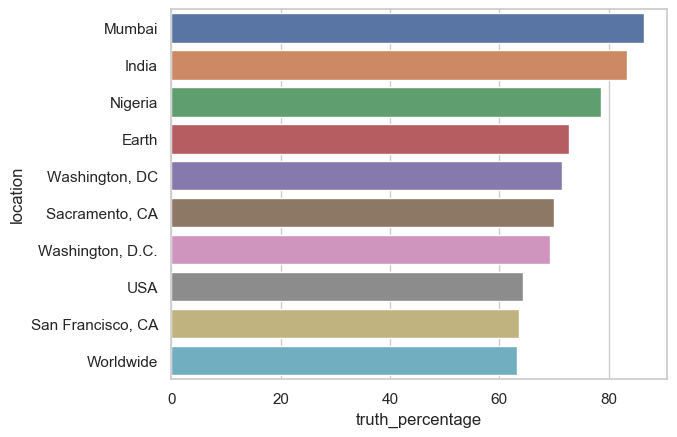

In [22]:
g = sns.barplot(x=droped_sorted['truth_percentage'].nlargest(10),y=droped_sorted['truth_percentage'].nlargest(10).index,orient='h')